Time Series
===
is a sequences of data with time vaiable, $\{X_t\}$, where the time variable $t$ is discrete or continuous.

1. Trend Observation,
2. Future Prediction, Meta's [Prophet]() Introduction
3. Cloudy Implement, Streamlit artefact

REf
--
1. [Prophet](https://blog.devops.dev/how-to-build-a-stock-prediction-app-in-python-95fa3b43865e)
2. [Hierarchical Time Series Forecasting](https://towardsdatascience.com/a-simple-approach-to-hierarchical-time-series-forecasting-with-machine-learning-2e180d83966c)

In [ ]:
!pip install -q prophet

In [1]:
# prompt: use yfinace to download APPL and NVDA stock prices in daily since two 2019

import yfinance as yf

# Download Apple stock prices from 2019-01-01 to present
aapl = yf.download('AAPL', start='2019-01-01')

# Download Nvidia stock prices from 2019-01-01 to present
nvda = yf.download('NVDA', start='2019-01-01')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# import ticks togeter
import yfinance as yf
import pandas as pd

ticks= 'AAPL NVDA'
df= yf.download(ticks, start='2019-01-01')['Close']
df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,NVDA
Date,,
2019-01-02,39.480000,3.40550
2019-01-03,35.547501,3.19975
2019-01-04,37.064999,3.40475
2019-01-07,36.982498,3.58500
2019-01-08,37.687500,3.49575


<Axes: xlabel='Date'>

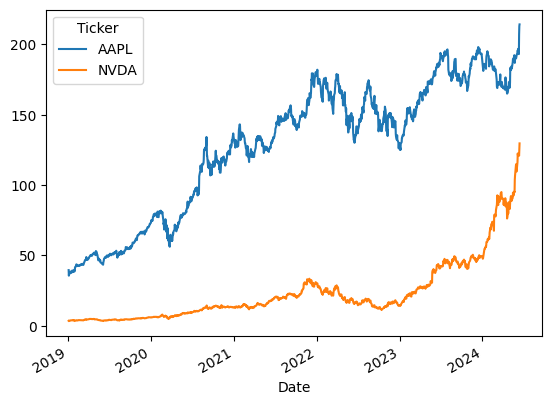

In [ ]:
# prompt: visualize

df.plot()


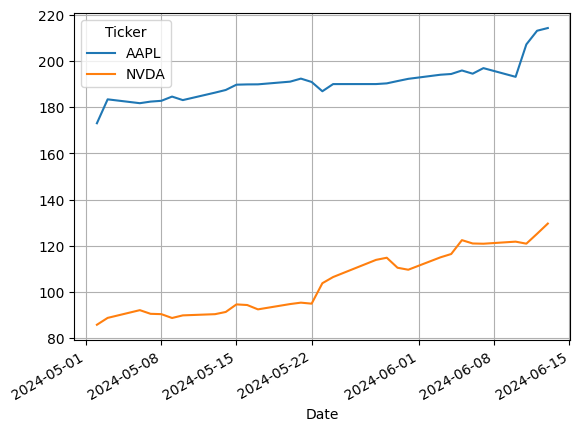

In [ ]:
import matplotlib.pyplot as plt
df.iloc[-30:,:].plot()
plt.grid()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1372 entries, 2019-01-02 to 2024-06-13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1372 non-null   float64
 1   NVDA    1372 non-null   float64
dtypes: float64(2)
memory usage: 32.2 KB


In [ ]:
import plotly.express as px

fig = px.line(df, x='Date', y=['AAPL','NVDA'],
              width=800,height=400,
              line_shape='linear')
fig.update_layout(title_text='Stock Price', title_x=0.5)

fig.show()

In [ ]:
# the most simple way
px.line(df,x='Date',y=['AAPL','NVDA'])

In [ ]:
pip install -q pyecharts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.3/146.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
# prompt: use pyecharts to visualize

from pyecharts.charts import Line

# Create a Kline object
#line = Line("AAPL and NVDA Stock Prices")
line=(
  Line()
  # Add the data to the Line object, only list data accepted
  .add_xaxis(df.index.tolist())
  .add_yaxis('Apple Inc',df['AAPL'].values.tolist())
  .add_yaxis('Nvidia',df['NVDA'].values.tolist())
    )



In [ ]:
# generte HTML file
line.render()

'/content/render.html'

In [ ]:
from IPython.display import HTML
HTML("render.html")

Questions
---
1. What happens in the past?
2. What are the trends? Cow or Bear?
3. Future Prediction
4. ...

One of the important observation is "curve smoothing".



In [ ]:
# get out the data, NVDA, for example
df_AAPL=df[['AAPL']]
df_NVDA=df[['NVDA']]

In [ ]:
df_AAPL['ds']=list(df_AAPL.index)
df_NVDA['ds']=list(df_NVDA.index)

<ipython-input-126-af3a16220a38>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-af3a16220a38>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# I will need this list to plot later the smoothed series
computed_features = []

for window_size in [5, 22]:
  df_AAPL.loc[:,f'{window_size}_MA'] = df_AAPL['AAPL'].rolling(window=window_size).mean()#, center=True).mean()
  #df_train.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_train['y'], window_size, 2)
  computed_features.append(f'{window_size}_MA')
  #computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
#df_AAPL['Date']=df_AAPL.index
px.line(df_AAPL,x='ds',y=['AAPL','5_MA','22_MA'])

In [ ]:
computed_features = []

for window_size in [5, 22]:
  #df_AAPL.loc[:,f'savgol_filter_{window_size}_MA'] = df_AAPL['AAPL'].rolling(window=window_size).mean()#, center=True).mean()
  df_AAPL.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_AAPL['AAPL'], window_size, 2)
  #computed_features.append(f'{window_size}_MA')
  computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
px.line(df_AAPL,x='ds',y=['AAPL','5_MA','22_MA','savgol_filter_5','savgol_filter_22'])

Conclusion
---
1. the Savitzky-Golay filter  captures the seasonality of the time series with no delay and removing the spikes,
2.  the moving average `focused` all its attention to the long term average, but losw many pieces of information contained in the signal.
3. `5-days` is also called "weekly moving average", and `22-days` called "monthly moving average".  

Prediction
---
This Meta's released, for uni- seasonality time-series data, makes prediction very easily.

In [2]:
!pip install -q prophet

In [3]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go

from datetime import date

In [4]:
# setting
# Constants for date range
Start = "2019-01-01"
Today = date.today().strftime("%Y-%m-%d")

ticks = ( 'AAPL', 'NVDA', 'AMZN', 'META', 'MSFT', 'TSLA', 'GOOG','ISRG')


In [5]:
def load_data(ticker):
    data = yf.download(ticker, Start, Today)
    data.reset_index(inplace=True)
    return data

In [6]:
# download data
Tick=['NVDA']
data = load_data(Tick)

[*********************100%%**********************]  1 of 1 completed


In [8]:
# First View
# Function to plot raw data
def plot_raw_data(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
    fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
    #st.plotly_chart(fig)
    return fig

plot_raw_data(data)

In [9]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,3.26600,3.462,3.25125,3.40550,3.378611,508752000
1,2019-01-03,3.34475,3.379,3.19225,3.19975,3.174487,705552000


In [10]:
# Predict forecast with Prophet
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})


In [11]:
m = Prophet()
m.fit(df_train)

duration={'week':5,'month':22,'year':252}

future = m.make_future_dataframe(periods=duration['week'])
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/cehm36_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/3nitr4lb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41121', 'data', 'file=/tmp/tmp335ywv27/cehm36_s.json', 'init=/tmp/tmp335ywv27/3nitr4lb.json', 'output', 'file=/tmp/tmp335ywv27/prophet_modeldmc02iwc/prophet_model-20240615044151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
# prompt: prophet visualization

plot_plotly(m, forecast)


Prophet also brings some historic experiences, the price varied weekly, yearly, for examples.

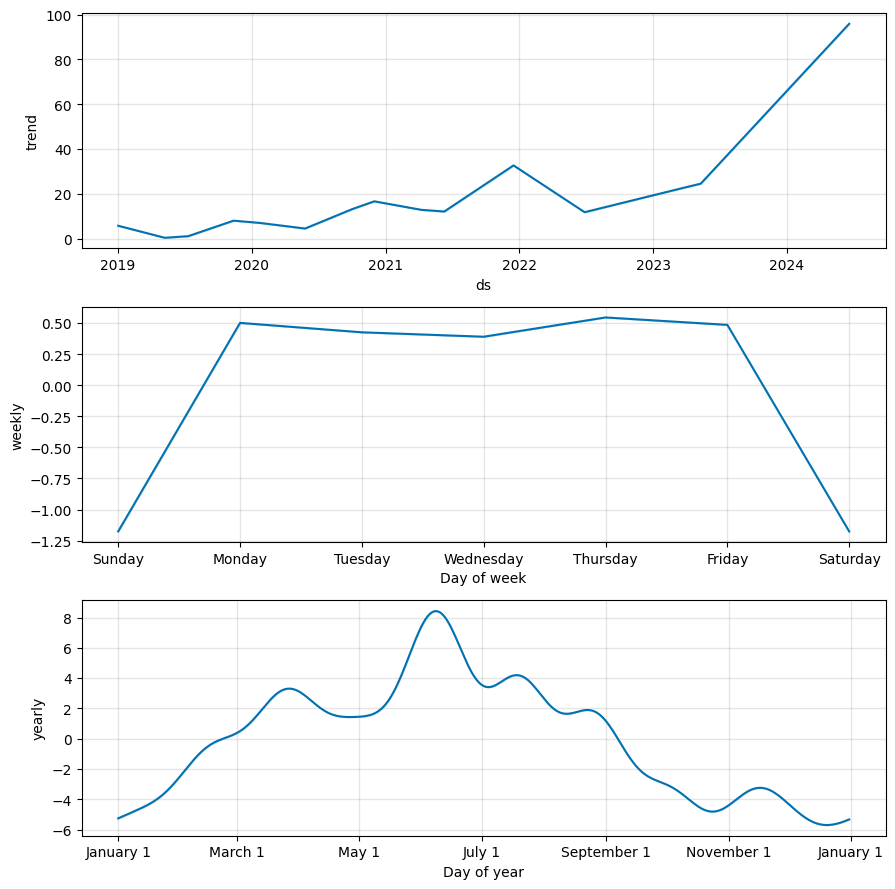

In [13]:
fig = m.plot_components(forecast)


But how the multiple-seasonality data
---
As we understood, financial data came from unknown and unknown resourcea and attected by them; for examples, holidays effect, the known one, and future sales the other.

`First` consider the facter, data lag: the future are always affected by the past.

In [14]:
# weekly
lag=5
df_train[f'lag_{lag}']=df_train['y'].shift(lag).fillna(0)

In [15]:
df_train.tail(6)

,ds,y,lag_5
1367,2024-06-07,120.888000,109.633003
1368,2024-06-10,121.790001,115.000000
1369,2024-06-11,120.910004,116.436996
1370,2024-06-12,125.199997,122.440002
1371,2024-06-13,129.610001,120.998001
1372,2024-06-14,131.880005,120.888000


In [16]:
import numpy as np
m = Prophet()
m.add_regressor('lag_5')
m.fit(df_train)

duration={'week':5,'month':22,'year':252}

lag='week'

future = m.make_future_dataframe(periods=duration[lag])
l1=list(df_train[f'lag_{duration[lag]}'].values)

# fill the added feature
future['lag_5']=l1+list(df_train['y'].tail(5).values)

forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/rjf9_lvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/gcolduqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27940', 'data', 'file=/tmp/tmp335ywv27/rjf9_lvf.json', 'init=/tmp/tmp335ywv27/gcolduqt.json', 'output', 'file=/tmp/tmp335ywv27/prophet_modelj276a2hh/prophet_model-20240615045905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:59:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
plot_plotly(m, forecast)


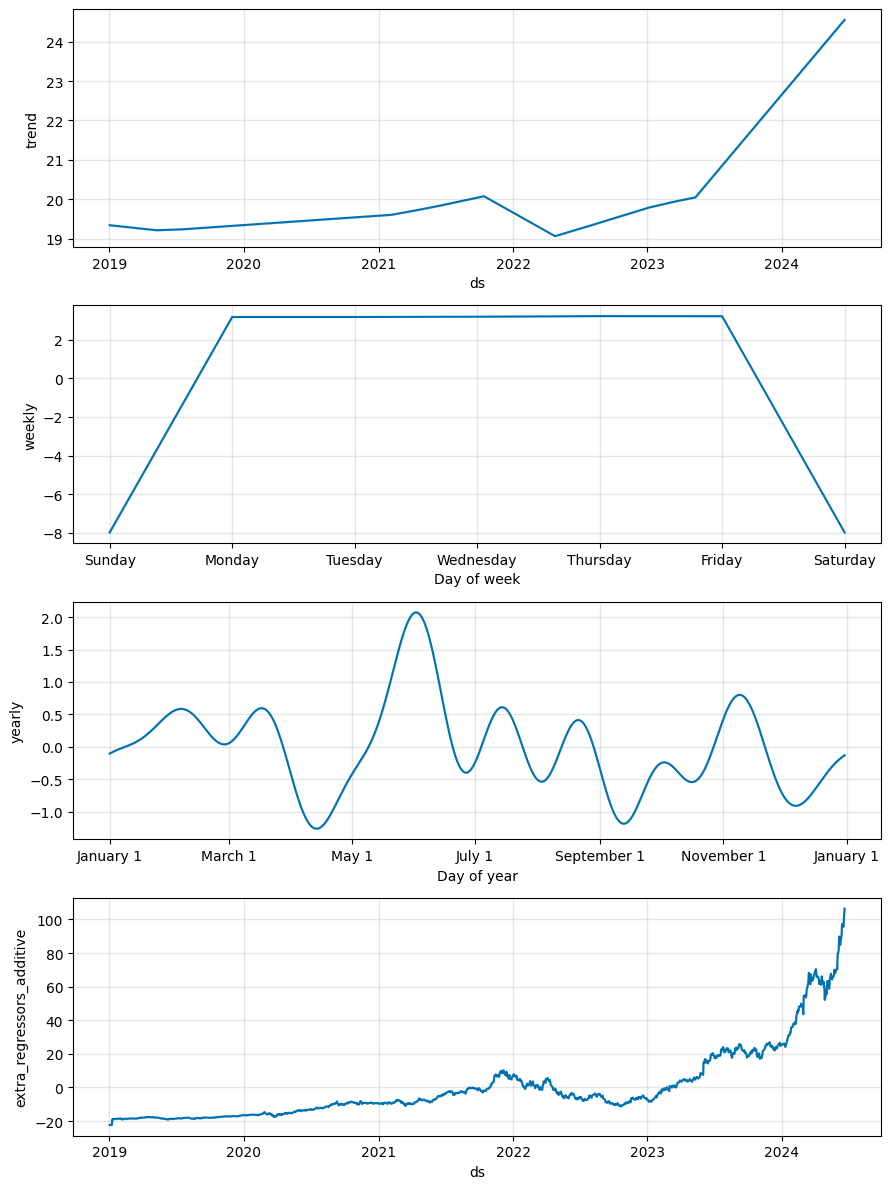

In [18]:
fig = m.plot_components(forecast)

`Secondly`, consider the holidys effect: define the holididys list and build.



In [21]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/_g8gj3uq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp335ywv27/m_4j2r22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2641', 'data', 'file=/tmp/tmp335ywv27/_g8gj3uq.json', 'init=/tmp/tmp335ywv27/m_4j2r22.json', 'output', 'file=/tmp/tmp335ywv27/prophet_modeld3h2n8wd/prophet_model-20240615051730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
future = m.make_future_dataframe(periods=duration['week'])
forecast = m.predict(future)

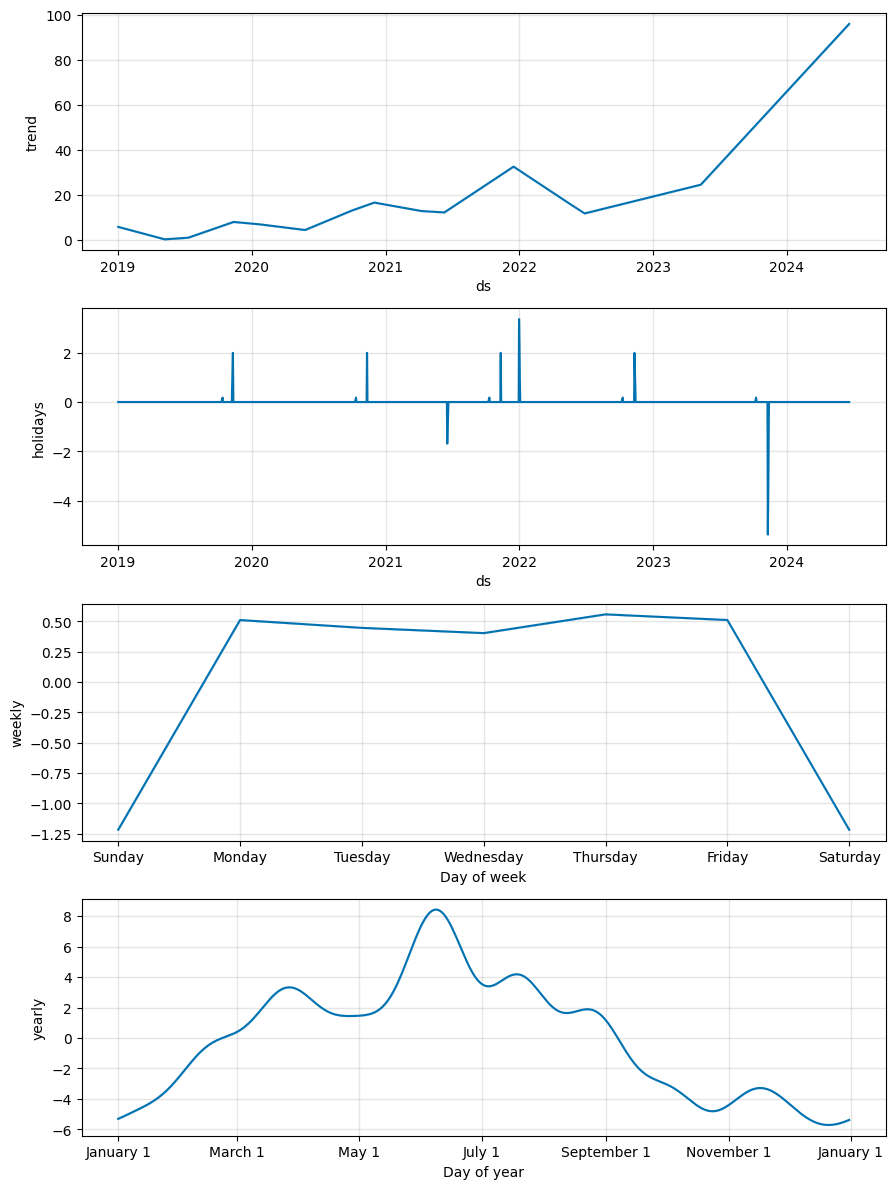

In [24]:
fig = m.plot_components(forecast)

In [ ]:
computed_features = []

for window_size in [5, 22]:
  df_NVDA.loc[:,f'{window_size}_MA'] = df_NVDA['NVDA'].rolling(window=window_size).mean()#, center=True).mean()
  #df_train.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_train['y'], window_size, 2)
  df_NVDA.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_NVDA['NVDA'], window_size, 2)

  computed_features.append(f'{window_size}_MA')
  computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
#df_NVDA['Date']=df_NVDA.index
px.line(df_NVDA,x='ds',y=['NVDA','5_MA','22_MA','savgol_filter_5','savgol_filter_22'])

In [ ]:
# https://medium.com/bip-xtech/stop-using-moving-average-to-smooth-your-time-series-2179af9ed59b

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import savgol_filter
import plotly.express as px
from statsforecast import StatsForecast

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
train = pd.read_csv('https://auto-arima-results.s3.amazonaws.com/M4-Hourly.csv')
test = pd.read_csv('https://auto-arima-results.s3.amazonaws.com/M4-Hourly-test.csv').rename(columns={'y': 'y_test'})
uid = np.array(['H386'])
df_train = train.query('unique_id in @uid')
df_test = test.query('unique_id in @uid')
StatsForecast.plot(df_train, df_test, plot_random = False, engine='plotly')

In [ ]:
computed_features = [] # I will need this list to plot later the smoothed series
for window_size in [10, 25]:
  df_train.loc[:,f'moving_average_{window_size}'] = df_train['y'].rolling(window=window_size, center=True).mean()
  df_train.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_train['y'], window_size, 2)
  computed_features.append(f'moving_average_{window_size}')
  computed_features.append(f'savgol_filter_{window_size}')

<ipython-input-44-603e71368abe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-603e71368abe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-603e71368abe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-603e713

In [ ]:
# prompt: what is rolling and it formula

# Rolling formula:
# y_t = (1/n) * (x_{t-n+1} + x_{t-n+2} + ... + x_t)

# Rolling is a statistical technique that calculates a moving average of a time series over a specified window size.
# It is used to smooth out short-term fluctuations in the data and to identify long-term trends.

# For example, if you have a time series of daily stock prices and you want to calculate a 10-day moving average, you would use the following formula:

# y_t = (1/10) * (x_{t-9} + x_{t-8} + ... + x_t)

# This would give you the average of the last 10 days' closing prices for each day in the time series.


,unique_id,ds,y,moving_average_10,savgol_filter_10,moving_average_25,savgol_filter_25
278760,H386,1,20.0,NaN,6.218182,NaN,-12.345641
278761,H386,2,14.0,NaN,13.236364,NaN,3.406154
278762,H386,3,14.0,NaN,20.754545,NaN,17.916254
278763,H386,4,14.0,NaN,28.772727,NaN,31.184660
278764,H386,5,24.0,NaN,37.290909,NaN,43.211371
278765,H386,6,26.0,43.8,57.681250,NaN,53.996388
278766,H386,7,72.0,47.9,68.712500,NaN,63.539710
278767,H386,8,118.0,53.9,77.437500,NaN,71.841338
278768,H386,9,77.0,59.0,80.418750,NaN,78.901271
278769,H386,10,59.0,63.7,75.112500,NaN,84.719509


In [ ]:
df_train.tail()

,unique_id,ds,y,moving_average_10,savgol_filter_10,moving_average_25,savgol_filter_25
279715,H386,956,73.0,94.8,103.139394,NaN,85.886020
279716,H386,957,58.0,NaN,87.022727,NaN,80.517369
279717,H386,958,55.0,NaN,67.262121,NaN,74.193311
279718,H386,959,46.0,NaN,43.857576,NaN,66.913846
279719,H386,960,40.0,NaN,16.809091,NaN,58.678974


In [ ]:
# prompt: what is savgol_filter

# Savitzky-Golay filter is a type of digital filter that is used to smooth data by fitting a polynomial to a subset of the data and then using the polynomial to predict the value of the data at the next point in time.

# The Savitzky-Golay filter is a type of moving average filter that uses a least squares fit to a polynomial to smooth the data.

# The Savitzky-Golay filter is often used to smooth noisy data or to identify trends in data.

# The Savitzky-Golay filter is defined by the following equation:

# y_t = a_0 + a_1*t + a_2*t^2 + ... + a_n*t^n

# where:

# y_t is the smoothed value of the data at time t
# t is the time variable
# a_0, a_1, ..., a_n are the coefficients of the polynomial

# The coefficients of the polynomial are determined by fitting the polynomial to a subset of the data.

# The size of the subset of data that is used to fit the polynomial is called the window size.

# The window size is typically chosen to be an odd number so that the polynomial can be centered on the data point that is being smoothed.

# The Savitzky-Golay filter is a powerful tool for smoothing data and identifying trends in data.

# However, it is important to note that the Savitzky-Golay filter can also introduce some distortion into the data.

# Therefore, it is important to use the Savitzky-Golay filter with caution.


In [ ]:
fig = px.line(df_train[df_train.ds>500], x='ds', y=['y'] + computed_features[:2], title='Different moving average estimators',
              labels={'Value': 'y', 'Date': 'Date'},
              line_shape='linear')

# Improve layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sensor Value',
    hovermode='x'
)

fig.show()

In [ ]:
fig = px.line(df_train[df_train.ds>500], x='ds', y=['y'] + computed_features[2:4], title='Different moving average estimators',
              labels={'Value': 'y', 'Date': 'Date'},
              line_shape='linear')

# Improve layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sensor Value',
    hovermode='x'
)

fig.show()

Conclusion
---
1. the Savitzky-Golay filter  captures the seasonality of the time series with no delay and removing the spikes,
2.  the moving average `focused` all its attention to the long term average, but losw many pieces of information contained in the signal.

